In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import os

In [2]:
DATA_DIR = '../data/cleaned'
OUTPUT_COLUMN = 'classification'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'cmr10'
matplotlib.rcParams['font.size'] = 10

In [3]:
def class_pie(names: list[str], output_filename: str) -> None:
    number = len(names) // 2
    fig, ax = plt.subplots(2, number)
    for i in range(2):
        for j in range(number):
            name = names[i * number + j]
            df = pd.read_csv(f'{DATA_DIR}/{name}')
            classifications = list(set(df[OUTPUT_COLUMN]))
            numbers = [len(df[df[OUTPUT_COLUMN] == classification]) for classification in classifications]
            ax[i][j].pie(x=numbers, labeldistance=None)
            #ax[i][j].title(f'{name[:-4].replace("_", " ").title()}')
            ax[i][j].text(0.5, 0, name[:-4].replace("_", " ").title(), horizontalalignment='center', verticalalignment='center',
                             transform = ax[i][j].transAxes)
    fig.savefig(f'{output_filename}.pdf', bbox_inches='tight', pad_inches = 0)
    fig.savefig(f'../../paper/italy/{output_filename}.pdf', bbox_inches='tight', pad_inches = 0)

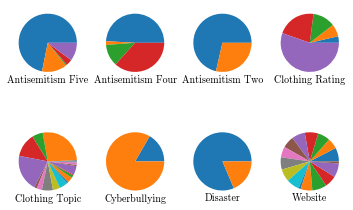

In [4]:
datasets = [file for file in os.listdir(DATA_DIR) if file.endswith('.csv') and 'news' not in file]
class_pie(datasets, 'fig1')

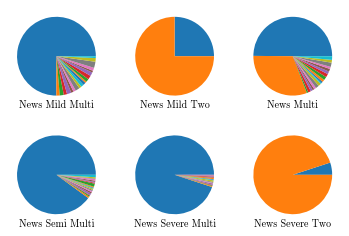

In [5]:
datasets = [file for file in os.listdir(DATA_DIR) if file.endswith('.csv') and 'news' in file]
class_pie(datasets, 'fig2')